**차원(dimension)**

테이터가 가진 속성을 특성이라고 한다. 사진의 경우 10,000개의 픽셀이 있기 때문에 10,000개의 특성이 있는 셈인데 머신러닝에서는 이러한 특성을 차원이라고 부른다.

*2차원 배열과 1차원 배열(백터)에서 차원이란 용어는 조금 다르게 사용한다. 다차원 배열에서 차원은 배열의 축 개수가 된다. 예를 들면 2차원일 때는 행과 열이 차원이 되는 것이다. 하지만 1차원 배열, 즉 백터일 경우에는 원소의 개수를 말한다.  


# **차원 축소(dimensionality reduction)**

비지도 학습 작업 중 하나인 차원 숙소 알고리즘.
특성이 많으면 선형 모델의 성능이 높아지고 훈련 데이터에 쉽게 과대적합이 된다. 차원 축소는 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법이다.

또 줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원도 가능하다.
이러한 대표적인 차원 숙소 알고리즘인 **주성분 분석(Principal Component Analysis,PCA)**에 대해 알아볼려고 한다.

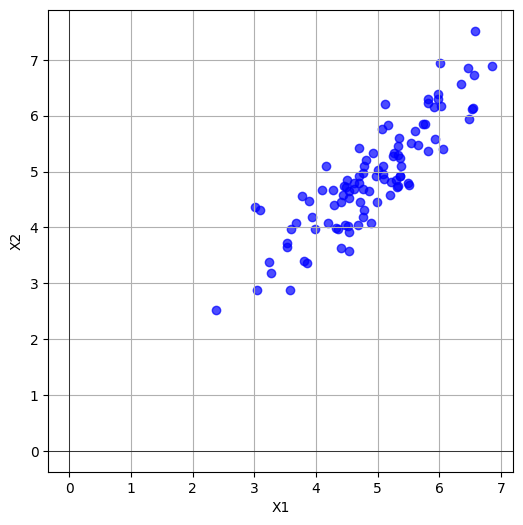

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 2차원 데이터 생성 (오른쪽 위로 향하는 경향이 있는 데이터)
np.random.seed(42)
x = np.random.normal(5, 1, 100)  # 평균 5, 표준편차 1인 데이터
y = x + np.random.normal(0, 0.5, 100)  # x에 약간의 잡음을 추가한 데이터

# 산점도 그래프 그리기
plt.figure(figsize=(6, 6))
plt.scatter(x, y, alpha=0.7, color='blue')
plt.axhline(0, color='black',linewidth=0.5) #수직선 그리기
plt.axvline(0, color='black',linewidth=0.5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()


위 데이터는 X1,X2 2개의 특성이 존재한다. 대각선 방향으로 길게 늘어진 형태를 가지고 있는데 데이터의 분포를 가장 잘 표현하는 방향을 찾아보도록 한다.

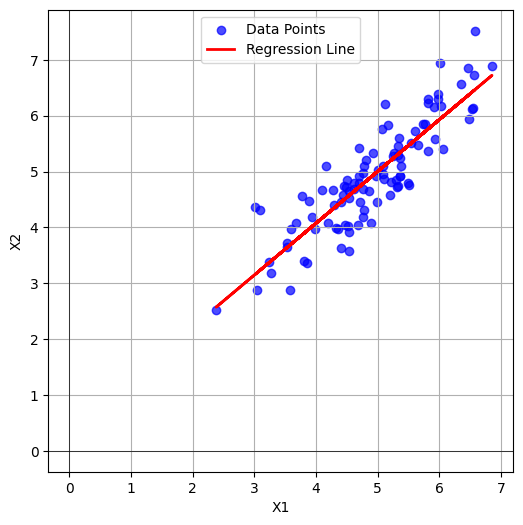

In [ ]:
from sklearn.linear_model import LinearRegression

# 1. 데이터 생성 (오른쪽 위로 향하는 경향이 있는 데이터)
np.random.seed(42)
x = np.random.normal(5, 1, 100)  # 평균 5, 표준편차 1인 데이터
y = x + np.random.normal(0, 0.5, 100)  # x에 약간의 잡음을 추가한 데이터

# 2. 선형 회귀 모델 생성
x_reshape = x.reshape(-1, 1)  # X 데이터를 2차원 배열로 변환
model = LinearRegression()
model.fit(x_reshape, y)

# 3. 회귀선을 계산
y_pred = model.predict(x_reshape)

# 4. 산점도 및 회귀선 그리기
plt.figure(figsize=(6, 6))
plt.scatter(x, y, alpha=0.7, color='blue', label='Data Points')
plt.plot(x, y_pred, color='red', linewidth=2, label='Regression Line')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.legend()
plt.show()


위 그래프에서 보여지는 것과 같이 대각선 방향이 분산이 가장 크다는 것을 알 수 있다.

*그림을 찾기 어려워서 대충 gpt로 비슷하게 그린 것임(선형회귀는 신경 x)



---



이러한 직선이 원점에서 출발한다면 두 원소로 이루어진 벡터로 사용할 수 있다.
이 벡터를 **주성분(principal component)** 라고 부른다.

주성분 벡터는 원본 데이터에 있는 어떤 방향인데, 주성분 벡터의 원소 개수는 원본 데이터셋에 있는 특성 개수와 같다.

하지만 원본 데이터는 주성분을 사용해 차원을 줄일 수 있다.

1.   첫번 째 주성분을 찾은 다음 이 벡터에 수직이고 분산이 가장 큰 다음 방향을 찾는다.
2.   1에서 찾은 벡터는 두 번째 주성분이다.



In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)


--2024-09-05 06:21:50--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2024-09-05 06:21:50--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2024-09-05 06:21:50--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [ ]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
  n = len(arr)  #샘플의 개수
  rows = int(np.ceil(n/10))
  #한 줄에 10개씩 이미지를 그림. 샘플 개수를 10으로 나누어 전체 행 개수를 계산한다.
  cols = n if rows < 2 else 10
  #행이 1개면 열의 개수는 샘플 개수, 그렇지 않으면 10개
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10+j < n: #n개 까지만 그림
        axs[i, j].imshow(arr[i*10+j], cmap='gray_r')
        axs[i, j].axis('off')
  plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)  # 50개의 주성분을 찾음
pca.fit(fruits_2d)
print(pca.components_.shape)  # (50, 10,000)

(50, 10000)


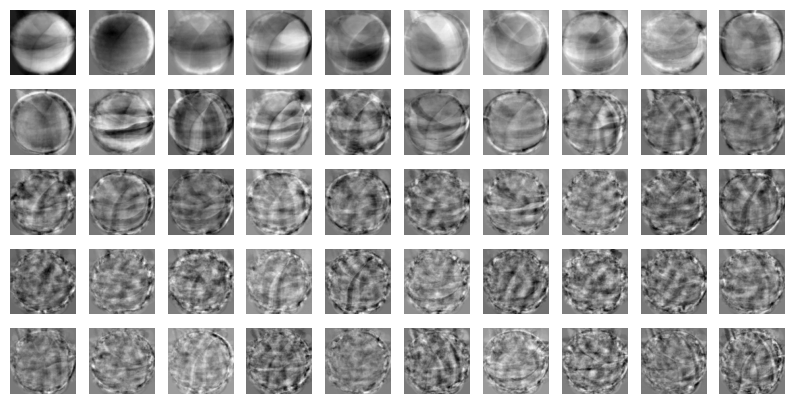

In [ ]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것이다.
주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성의 개수를 10,000개에서 50개로 줄일 수 있다.

In [ ]:
print(fruits_2d.shape) #만개의 픽셀을 가진 300개의 이미지

(300, 10000)


In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)  #PCA를 통해 50개로 1/200 줄이는데 성공

(300, 50)


**원본 데이터 재구성**

In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


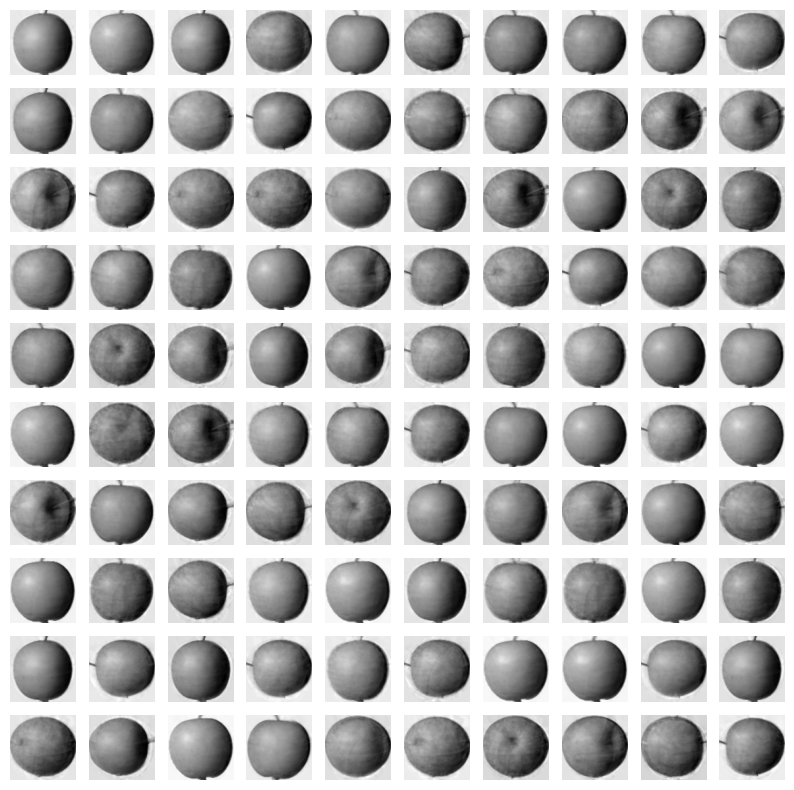

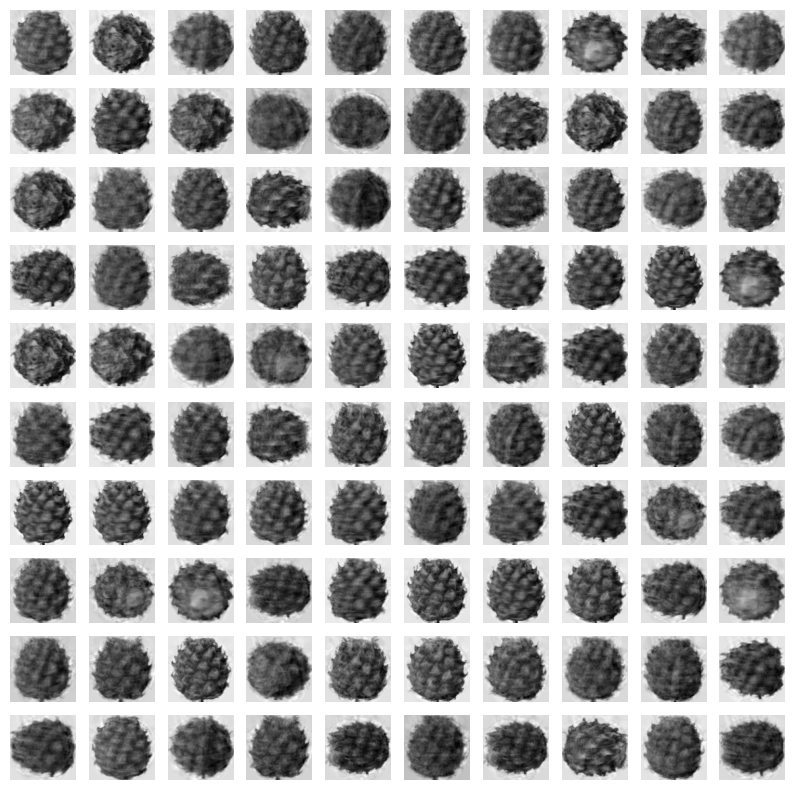

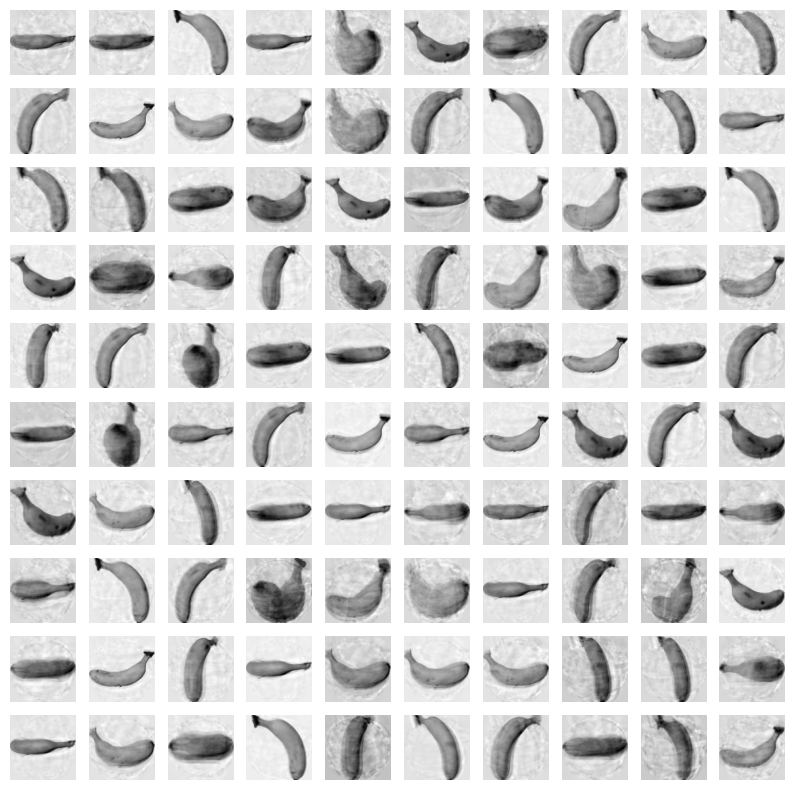

In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

**설명된 분산(explained variance)**

주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

In [11]:
print(np.sum(pca.explained_variance_ratio_))

0.9215796343775003


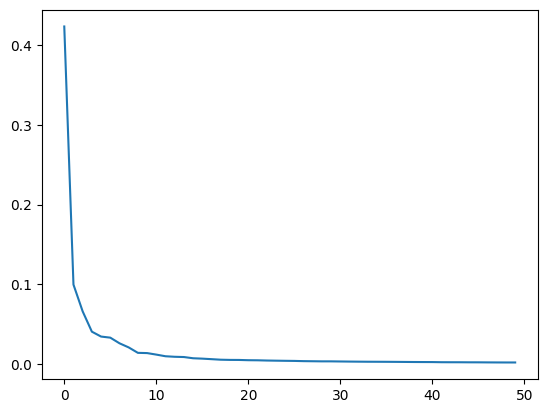

In [15]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [14]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [16]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
2.074144220352173


교차 검증의 점수가 0.997로 매우 높다. 특성이 10,000개이고 300개의 샘플이기 때문에 과대적합된 모델을 만들기 쉽다.

In [17]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.02333555221557617


PCA로 차원축소를 하여 50개의 특성만 사용하여 정확도 100%에 훈련 시간은 0.03초로 20배 이상 감소하였다.

In [18]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [19]:
print(pca.n_components_)

2


In [20]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [21]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.04358072280883789


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [22]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


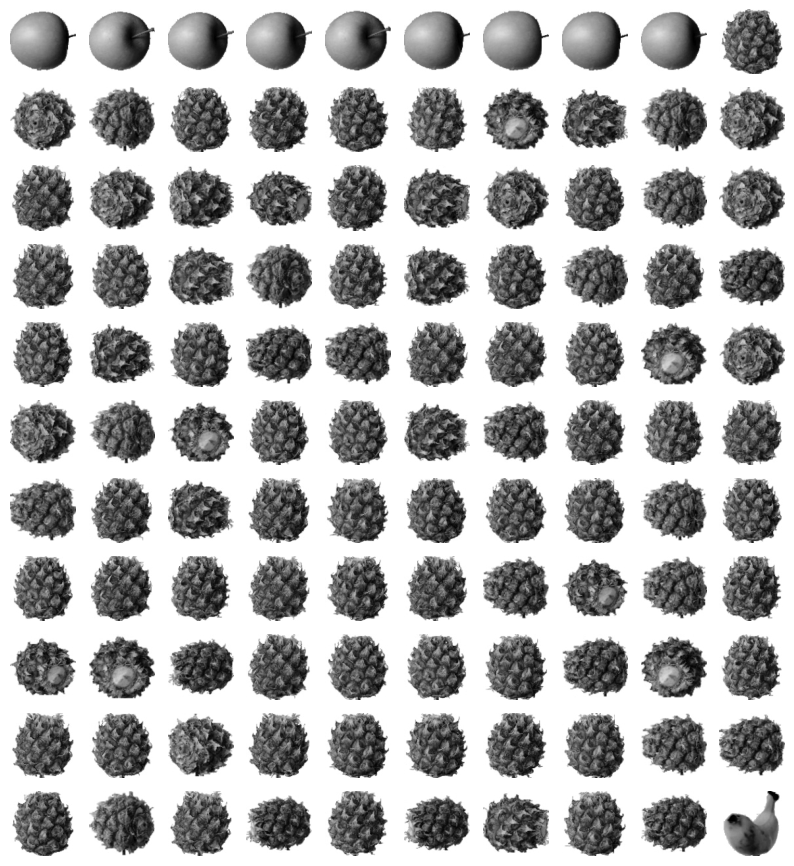

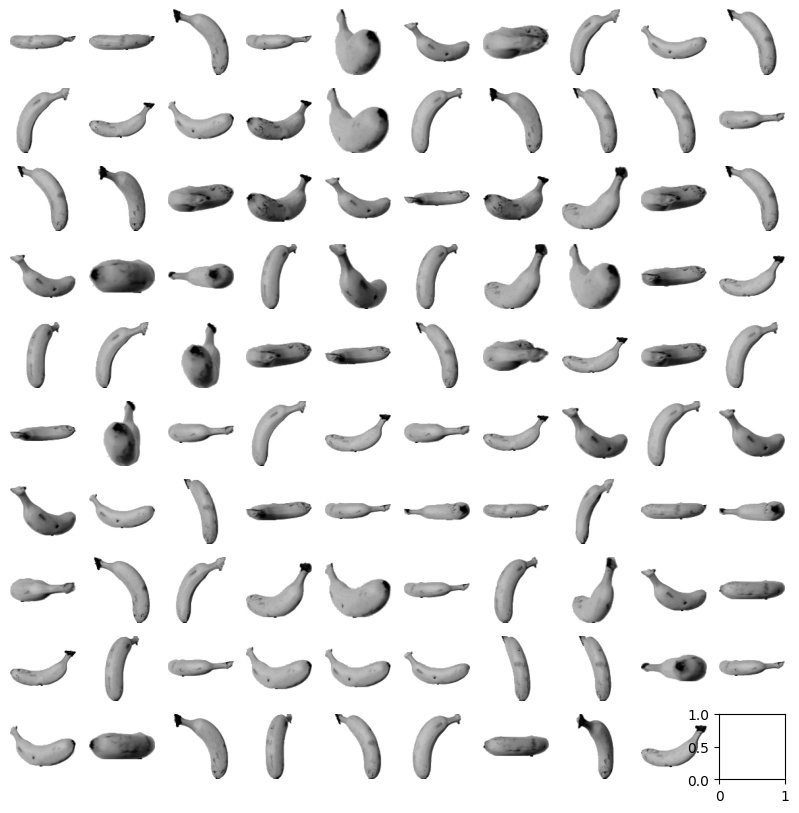

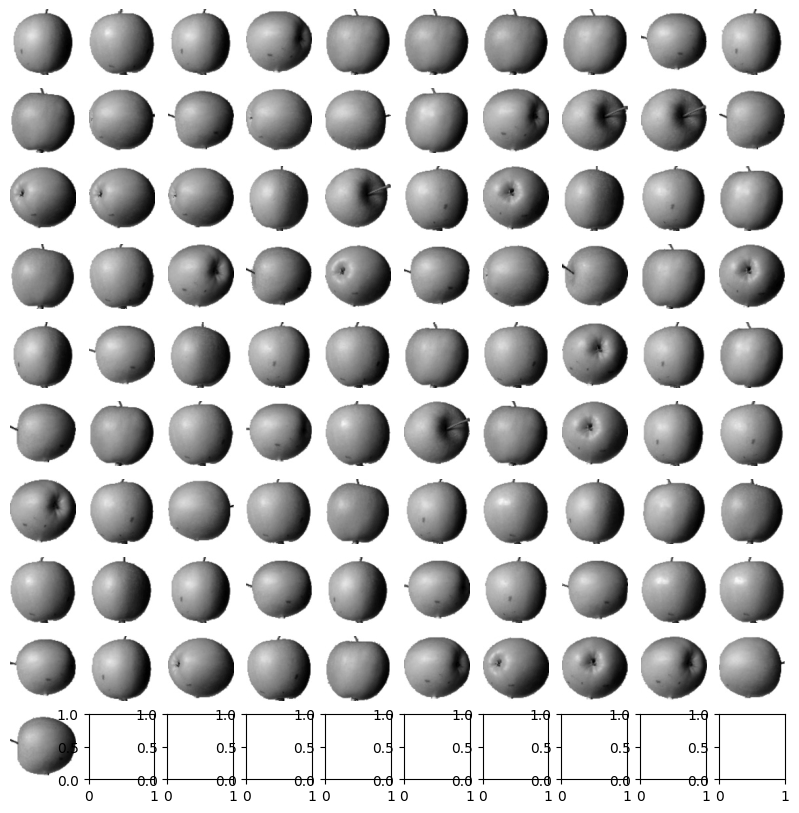

In [23]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_==label])
  print("\n")

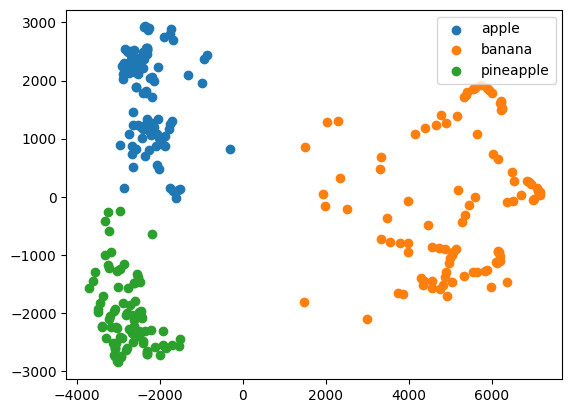

In [24]:
for label in range(0,3):
  data = fruits_pca[km.labels_==label]
  plt.scatter(data[:, 0], data[:, 1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()